## portfolio calculator based on CAPM model
 coded by : smgw 
 Lisence : GPL
# if you're kinda interested in this, plz inform : smgw@u.musashi.ac.jp

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def pMeans(R):
    # R: data set of stock price. must be a list of lists
    E_R = [np.mean(R[i]) for i in range(len(R))]
    return np.array(E_R)    

def pVars(R):
    # args are the same as pMeans()
    Vars_R = [np.cov(R)[i,i] for i in range(len(R))]
    return np.array(Vars_R)

def pCovs(R):
    # return value : covariance matrix ! 
    return np.cov(R)

def pCorrCoefs(R):
    # returns numpy array of correlated coefficients 
    tmp = []
    tmp2 = np.corrcoef(R)
    for j in range(len(R)):
        for k in range(j+1,len(R)):
            tmp.append(tmp2[j,k])
    return np.array(tmp)

def WeightComb(w) :
    # returns the numpy array of w_i w_j (i!=j ) for [... w_k ....]
    # w must be an array
    tmp = []
    for j in range(len(w)):
        for k in range(j+1,len(w)):
            tmp.append(w[j]*w[k])
    return np.array(tmp)

def CovComb(R):
    # just for convenience
    # picks up all covariance of R to construct a numpy array
    tmp=[]
    for j in range(len(R)):
        for k in range(j+1,len(R)):
            tmp.append(np.cov(R[j],R[k])[0,1])
    return np.array(tmp)

def SgmISgmJ(R):
    # R : dataset as descrived above
    # returns sigma_i X sigma_j for all i!=j( indices of R )
    tmp = []
    tmp2 = [np.cov(R)[i,i] for i in range(len(R))]
    for j in range(len(R)):
        for k in range(j+1,len(R)):
#            print(str(j) + ' - ' + str(k)) 
            tmp.append(np.sqrt(tmp2[j]*tmp2[k]))
    return np.array(tmp)

def pReturn(R,w) :
    # weighted mean value of the data set R ; the definition of return 
    # R: data set of stock price. must be a list of lists
    # w : weights. must be a list. length is the same as the list 'R'.
    return np.inner(pMeans(R),w)

def pReturn2(E,w):
    # E : list of expected income ratio for each stock(given), 
    # w : list of weights. both must be the same size
    return np.inner(E,w)

def pRisk(R,w):
    # Variance of the portfolio 
    # theoretically it is E((Sum(w_i(R_i - E(R~_i)))^2)
    w2=[w[i]**2 for i in range(len(w))]
    wiwj=WeightComb(w)
    return np.inner(np.array(w2),pVars(R)) + 2*np.inner(wiwj,CovComb(R))

def pRisk2(Sigma2,w, cc):
    # Variance of the portfolio, using correlation coefficients cc
    # cc must be a list, like [ cc[0,1] , cc[0,2]  ... cc[n-1,n] ] 
    # Sigma2 is a list of variances
    w2=[w[i]**2 for i in range(len(w))]
    wiwj=WeightComb(w)
    tmp = []
    counter=0
    for j in range(len(Sigma2)):
        for k in range(j+1,len(Sigma2)):
            tmp.append(np.sqrt(Sigma2[j]*Sigma2[k])*cc[counter])
            counter=counter+1
    return np.inner(np.array(w2),Sigma2) + 2*np.inner(wiwj,np.array(tmp))

In [15]:
def twobrandsRisk(v,w,cc):
    # w : weights; [w_A, w_B]
    # v : variances; [Ver_A, Ver_B]
    # cc : correlaton coefficient
#    w2 = np.array(w**2)
#    print(w2)
    return np.inner(w,v) + 2*w[0]*w[1]*cc*v[0]*v[1]

# ============ experiments ===============

In [16]:
epsilon = lambda  d : np.random.normal(0,d)

In [17]:
def WeightGenerator(n):
    # weight generator. makes n partitions on [0,1]
    tmp = [0] + list(np.random.uniform(0,1,n-1)) + [1]
    tmp2 = np.sort(tmp)
    return [tmp2[j+1]-tmp2[j] for j in range(n)]

In [5]:
# sum(WeightGenerator(100))
#xx = [1,2,3] + [3]

In [20]:
dim = 5
R_1 = np.array([[i+epsilon(2) for i in range(10)] for j in range(dim)])
ww = np.array(WeightGenerator(dim))
Sgm = pVars(R_1)
ccc = pCorrCoefs(R_1)

In [21]:
ccc

array([0.85375926, 0.8905687 , 0.63722673, 0.91566043, 0.71005682,
       0.78546714, 0.85697068, 0.62045338, 0.89055676, 0.66367897])

In [22]:
pRisk(R_1,ww)

16.193056973986067

In [23]:
pRisk2(Sgm,ww,ccc)

16.193056973986067

In [3]:
# -------------------- 2 brands simulation -----------------

In [24]:
SD = np.array([0.2, 0.1])  # std. deviations
VR = SD**2
EP = np.array([0.3,0.1])   # expected profits
CC = np.array([ 0.1*i for i in range(-10,11) ])  # Correlation Coefficients 

In [25]:
www = np.array([[i*0.1+0.05,1-i*0.1-0.05] for i in range(10)])

In [10]:
Weights = np.array([WeightGenerator(2) for i in range(10)])

In [110]:
#print(www) ; print(Weights)

In [26]:
#PEP = np.array([Weights[i][0]*EP[0]+Weights[i][1]*EP[1] for i in range(len(Weights))]) # Expected Profits of the portfolio
PEP = np.array([www[i][0]*EP[0]+www[i][1]*EP[1] for i in range(len(www))])
##  Standard Deviations, with the variety of correlation coefficients (CC)
#PSD = [[np.sqrt(pRisk2(VR,np.array(Weights[j]),[CC[i]])) for j in range(len(Weights))] for i in range(-10,11)]
PSD = [[np.sqrt(pRisk2(VR,np.array(www[j]),[CC[i]])) for j in range(len(www))] for i in range(-10,11)]
# PSD = [[np.sqrt(twobrandsRisk(VR,np.array(www[j]),CC[i])) for j in range(len(www))] for i in range(-10,11)]

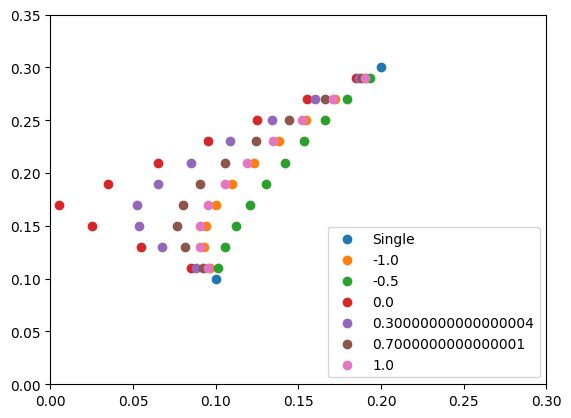

In [27]:
fig, ax = plt.subplots()
plt.xlim(0,0.3)
plt.ylim(0,0.35)
#plt.legend()

ax.scatter(SD,EP, label='Single')
ax.scatter(PSD[0],PEP, label=CC[0])
#ax.scatter(PSD[3],PEP, label=CC[3])
ax.scatter(PSD[5],PEP, label=CC[5])
#ax.scatter(PSD[7],PEP, label=CC[7])
#ax.scatter(PSD[9],PEP, label=CC[9])
ax.scatter(PSD[10],PEP, label=CC[10])
ax.scatter(PSD[13],PEP, label=CC[13])
#ax.scatter(PSD[15],PEP, label=CC[15])
ax.scatter(PSD[17],PEP, label=CC[17])
#ax.scatter(PSD[19],PEP, label=CC[19])
ax.scatter(PSD[20],PEP, label=CC[20])
ax.legend()

In [141]:
#PSD

# =========== experiments end ==============

In [142]:
CC

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])